In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa tensorflow scikit-learn matplotlib seaborn


In [ ]:
!git clone https://github.com/tensorflow/models.git


Cloning into 'models'...
remote: Enumerating objects: 99128, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 99128 (delta 44), reused 26 (delta 26), pack-reused 99058 (from 2)
Receiving objects: 100% (99128/99128), 622.81 MiB | 18.24 MiB/s, done.
Resolving deltas: 100% (72078/72078), done.


In [ ]:
%cd /content/models/research/audioset/vggish


/content/models/research/audioset/vggish


In [ ]:
!wget https://storage.googleapis.com/audioset/vggish_model.ckpt
!wget https://storage.googleapis.com/audioset/vggish_pca_params.npz


--2025-01-20 15:15:25--  https://storage.googleapis.com/audioset/vggish_model.ckpt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291108469 (278M) [application/octet-stream]
Saving to: ‘vggish_model.ckpt’

vggish_model.ckpt   100%[===================>] 277.62M  96.7MB/s    in 2.9s    

2025-01-20 15:15:28 (96.7 MB/s) - ‘vggish_model.ckpt’ saved [291108469/291108469]

--2025-01-20 15:15:28--  https://storage.googleapis.com/audioset/vggish_pca_params.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73020 (71K) [application/octet-stream]
Saving to: ‘vggish_

In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.7 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.append('/content/models/research/audioset/vggish')


In [ ]:
!git clone https://github.com/harritaylor/torchvggish.git


Cloning into 'torchvggish'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 209 (delta 29), reused 24 (delta 24), pack-reused 172 (from 1)
Receiving objects: 100% (209/209), 328.85 KiB | 1.26 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
!pip install tensorflow tensorflow_hub librosa


In [ ]:
import sys
sys.path.append('/content/models/research/audioset/vggish')



In [ ]:
!ls /content/models/research/audioset/vggish


mel_features.py   torchvggish		    vggish_model.ckpt	   vggish_slim.py
__pycache__	  vggish_export_tfhub.py    vggish_params.py	   vggish_smoke_test.py
README.md	  vggish_inference_demo.py  vggish_pca_params.npz  vggish_train_demo.py
requirements.txt  vggish_input.py	    vggish_postprocess.py


In [ ]:
import sys
sys.path.append('/content/models/research/audioset/vggish')


try:
    import vggish_input, vggish_slim
    print("VGGish imported successfully")
except Exception as e:
    print(f"Error importing VGGish: {e}")

VGGish imported successfully


In [ ]:
# Navigate to the directory where the vggish module is located
!cd /content/models/research/audioset

# Build and install the module
!python setup.py install


python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
!pwd
!ls


/content
drive  models  sample_data


In [ ]:
%cd /content/models
!ls


/content/models
AUTHORS		    CODEOWNERS	CONTRIBUTING.md  ISSUES.md  official  README.md  SECURITY.md
CODE_OF_CONDUCT.md  community	docs		 LICENSE    orbit     research	 tensorflow_models


In [ ]:
%cd /content/models/research/audioset
!ls


/content/models/research/audioset
README.md  vggish  yamnet


In [ ]:
import sys
sys.path.append('/content/models/research/audioset/vggish')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


dataset_path = '/content/drive/MyDrive/Dataset'
train_folder = os.path.join(dataset_path, 'train')
not_train_folder = os.path.join(dataset_path, 'not train')

# Import VGGish modules

from vggish import vggish_input, vggish_slim

from vggish.vggish_params import SAMPLE_RATE, NUM_FRAMES

# Function to extract VGGish embeddings from audio files
def extract_embeddings(audio_path):
    print(f"Processing: {audio_path}")
    try:

        examples = vggish_input.wavfile_to_examples(audio_path)
        print(f"Successfully converted WAV file to examples: {audio_path}")

        # Create the VGGish graph and run the session
        with tf.Graph().as_default(), tf.compat.v1.Session() as sess:
            print("Setting up VGGish model...")
            vggish_slim.define_vggish_slim()
            vggish_slim.load_vggish_slim_checkpoint(sess, '/content/models/research/audioset/vggish/vggish_model.ckpt')
            features_tensor = sess.graph.get_tensor_by_name('vggish/input_features:0')
            embeddings_tensor = sess.graph.get_tensor_by_name('vggish/embedding:0')

            # Run the session to get the embeddings
            print("Extracting embeddings...")
            [embeddings] = sess.run([embeddings_tensor], feed_dict={features_tensor: examples})

        print(f"Embeddings extracted for {audio_path}")
        return np.mean(embeddings, axis=0)
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None


audio_paths = []
labels = []

for label, folder in enumerate([train_folder, not_train_folder]):
    for file_name in os.listdir(folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder, file_name)
            audio_paths.append(file_path)
            labels.append(label)

# Extract embeddings and filter out errors
embeddings = []
filtered_labels = []

for i, path in enumerate(audio_paths):
    print(f"Extracting embedding for file {i + 1}/{len(audio_paths)}: {path}")
    embedding = extract_embeddings(path)
    if embedding is not None:
        embeddings.append(embedding)
        filtered_labels.append(labels[i])

embeddings = np.array(embeddings)
filtered_labels = np.array(filtered_labels)


X_train, X_temp, y_train, y_temp = train_test_split(embeddings, filtered_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 0.5 * 0.2 = 0.1

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


model = Sequential([
    Dense(128, activation='relu', input_shape=(128,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('/content/drive/My Drive/train_sound_classifier.h5')


Extracting embedding for file 1/797: /content/drive/MyDrive/Dataset/train/clip_42.wav
Processing: /content/drive/MyDrive/Dataset/train/clip_42.wav
Successfully converted WAV file to examples: /content/drive/MyDrive/Dataset/train/clip_42.wav
Setting up VGGish model...


/usr/local/lib/python3.11/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.11/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


Extracting embeddings...
Embeddings extracted for /content/drive/MyDrive/Dataset/train/clip_42.wav
Extracting embedding for file 2/797: /content/drive/MyDrive/Dataset/train/clip_35.wav
Processing: /content/drive/MyDrive/Dataset/train/clip_35.wav
Successfully converted WAV file to examples: /content/drive/MyDrive/Dataset/train/clip_35.wav
Setting up VGGish model...
Extracting embeddings...
Embeddings extracted for /content/drive/MyDrive/Dataset/train/clip_35.wav
Extracting embedding for file 3/797: /content/drive/MyDrive/Dataset/train/clip_101.wav
Processing: /content/drive/MyDrive/Dataset/train/clip_101.wav
Successfully converted WAV file to examples: /content/drive/MyDrive/Dataset/train/clip_101.wav
Setting up VGGish model...
Extracting embeddings...
Embeddings extracted for /content/drive/MyDrive/Dataset/train/clip_101.wav
Extracting embedding for file 4/797: /content/drive/MyDrive/Dataset/train/clip_58.wav
Processing: /content/drive/MyDrive/Dataset/train/clip_58.wav
Successfully con

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.7685 - loss: 0.4908 - val_accuracy: 1.0000 - val_loss: 0.0464
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9937 - loss: 0.0714 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 7.5164e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 4.8297e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 7.0618e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 2.3639e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 

Test accuracy: 100.00%


In [ ]:
import tensorflow as tf
import vggish_slim

# Path to the VGGish model checkpoint
checkpoint_path = '/content/models/research/audioset/vggish/vggish_model.ckpt'

# Create a TensorFlow session
sess = tf.compat.v1.Session()

# Load the VGGish model
vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

# List all operations in the graph
for op in sess.graph.get_operations():
    print(op.name)

# Close the session
sess.close()


Streaming output truncated to the last 5000 lines.
vggish_682/pool1/MaxPool
vggish_682/conv2/Conv2D/ReadVariableOp
vggish_682/conv2/Conv2D
vggish_682/conv2/BiasAdd/ReadVariableOp
vggish_682/conv2/BiasAdd
vggish_682/conv2/Relu
vggish_682/pool2/MaxPool
vggish_682/conv3/conv3_1/Conv2D/ReadVariableOp
vggish_682/conv3/conv3_1/Conv2D
vggish_682/conv3/conv3_1/BiasAdd/ReadVariableOp
vggish_682/conv3/conv3_1/BiasAdd
vggish_682/conv3/conv3_1/Relu
vggish_682/conv3/conv3_2/Conv2D/ReadVariableOp
vggish_682/conv3/conv3_2/Conv2D
vggish_682/conv3/conv3_2/BiasAdd/ReadVariableOp
vggish_682/conv3/conv3_2/BiasAdd
vggish_682/conv3/conv3_2/Relu
vggish_682/pool3/MaxPool
vggish_682/conv4/conv4_1/Conv2D/ReadVariableOp
vggish_682/conv4/conv4_1/Conv2D
vggish_682/conv4/conv4_1/BiasAdd/ReadVariableOp
vggish_682/conv4/conv4_1/BiasAdd
vggish_682/conv4/conv4_1/Relu
vggish_682/conv4/conv4_2/Conv2D/ReadVariableOp
vggish_682/conv4/conv4_2/Conv2D
vggish_682/conv4/conv4_2/BiasAdd/ReadVariableOp
vggish_682/conv4/conv4_2/Bi

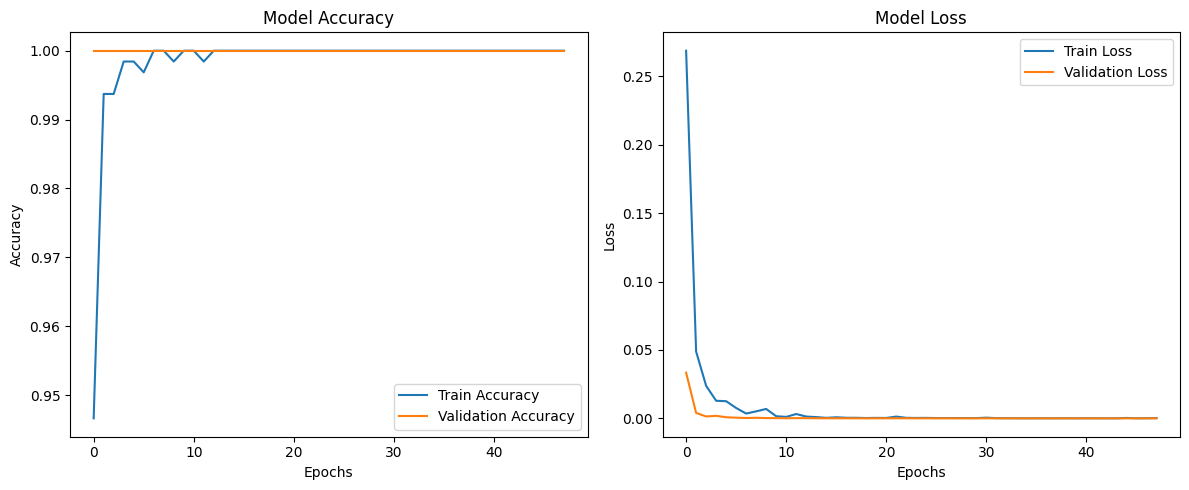

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


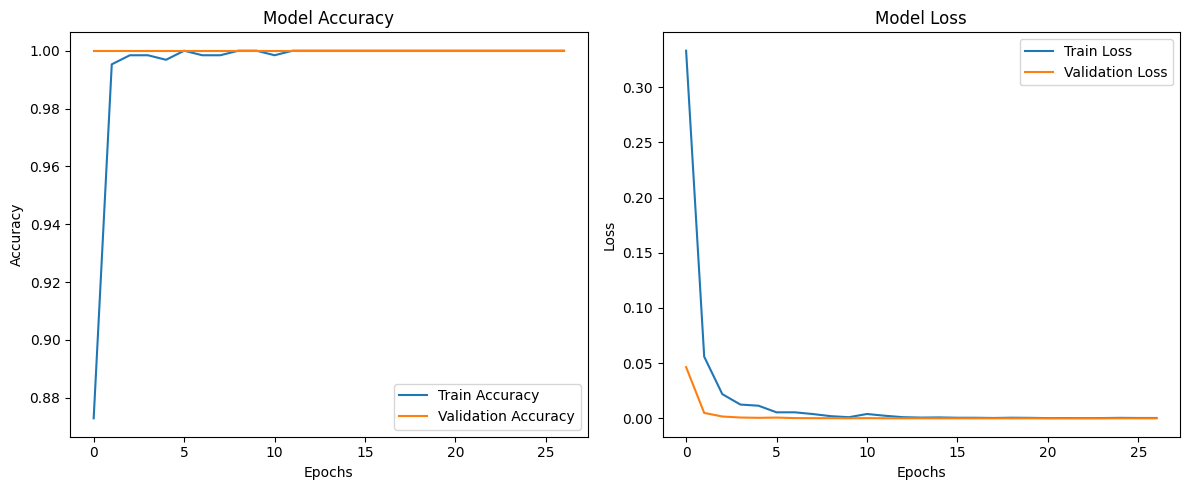

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


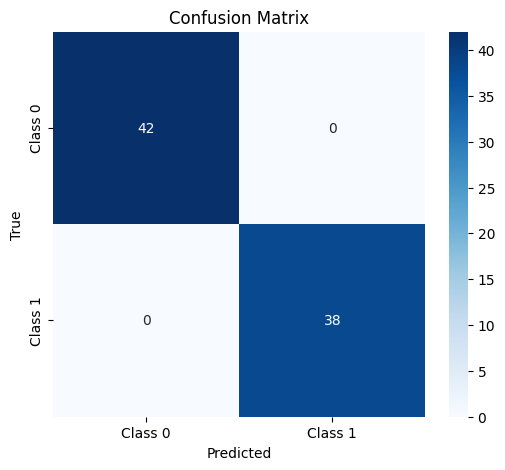

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,696 (291.79 KB)

 Trainable params: 24,898 (97.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,798 (194.53 KB)

In [ ]:
# Check label distribution in training, validation, and test sets
import numpy as np

print(f"Training labels distribution: {np.bincount(np.argmax(y_train, axis=1))}")
print(f"Validation labels distribution: {np.bincount(np.argmax(y_val, axis=1))}")
print(f"Test labels distribution: {np.bincount(np.argmax(y_test, axis=1))}")


Training labels distribution: [320 317]
Validation labels distribution: [38 42]
Test labels distribution: [42 38]


In [ ]:
# Check the number of samples in each split
print(f"Total samples in the dataset: {len(embeddings)}")
print(f"Samples in training set: {len(X_train)}")
print(f"Samples in validation set: {len(X_val)}")
print(f"Samples in test set: {len(X_test)}")

# Check the distribution of labels in each split
print("Training set label distribution:")
unique_train, counts_train = np.unique(y_train.argmax(axis=1), return_counts=True)
print(dict(zip(unique_train, counts_train)))

print("Validation set label distribution:")
unique_val, counts_val = np.unique(y_val.argmax(axis=1), return_counts=True)
print(dict(zip(unique_val, counts_val)))

print("Test set label distribution:")
unique_test, counts_test = np.unique(y_test.argmax(axis=1), return_counts=True)
print(dict(zip(unique_test, counts_test)))


Total samples in the dataset: 797
Samples in training set: 637
Samples in validation set: 80
Samples in test set: 80
Training set label distribution:
{0: 320, 1: 317}
Validation set label distribution:
{0: 38, 1: 42}
Test set label distribution:
{0: 42, 1: 38}


In [ ]:
print(f"Total embeddings before split: {len(embeddings)}")


Total embeddings before split: 797


In [ ]:
# Check the number of samples in each split
train_size = int(0.8 * len(embeddings))  # 80% for training
val_size = int(0.1 * len(embeddings))    # 10% for validation
test_size = len(embeddings) - train_size - val_size  # The remaining 10% for testing

# Verify the split
print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {test_size}")


Training set size: 637
Validation set size: 79
Test set size: 81


In [ ]:
# Check the distribution of labels across training, validation, and test sets
train_labels = labels[:train_size]
val_labels = labels[train_size:train_size+val_size]
test_labels = labels[train_size+val_size:]

# Print label distributions
print(f"Training set label distribution: {np.bincount(train_labels)}")
print(f"Validation set label distribution: {np.bincount(val_labels)}")
print(f"Test set label distribution: {np.bincount(test_labels)}")


Training set label distribution: [400 237]
Validation set label distribution: [ 0 79]
Test set label distribution: [ 0 81]


In [ ]:
# Check the label distribution before splitting (original labels)
print(f"Total labels before split: {np.bincount(labels)}")

# Convert one-hot encoded labels to class indices (for distribution check)
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# After split, check the distribution in training, validation, and test sets
print(f"Training set label distribution: {np.bincount(y_train_labels)}")
print(f"Validation set label distribution: {np.bincount(y_val_labels)}")
print(f"Test set label distribution: {np.bincount(y_test_labels)}")

# Optionally, display the first few labels in each set for inspection
print(f"First 10 labels in the training set: {y_train_labels[:10]}")
print(f"First 10 labels in the validation set: {y_val_labels[:10]}")
print(f"First 10 labels in the test set: {y_test_labels[:10]}")


Total labels before split: [400 397]
Training set label distribution: [320 317]
Validation set label distribution: [38 42]
Test set label distribution: [42 38]
First 10 labels in the training set: [0 1 0 0 0 0 0 0 0 1]
First 10 labels in the validation set: [1 1 1 0 1 1 0 1 1 1]
First 10 labels in the test set: [0 0 1 0 1 1 1 0 0 1]


In [ ]:
# Inspect embeddings for each class
train_embeddings = [embedding for i, embedding in enumerate(all_embeddings) if labels[i] == 0]
not_train_embeddings = [embedding for i, embedding in enumerate(all_embeddings) if labels[i] == 1]

# Print the first few embeddings of each class
print(f"Train embeddings (first 5): {train_embeddings[:5]}")
print(f"Not train embeddings (first 5): {not_train_embeddings[:5]}")


Train embeddings (first 5): [array([-0.3655118 ,  0.53491974, -0.10913712, -0.87147456, -0.52136207,
       -1.116359  , -0.4899357 , -0.6229515 , -0.5657907 , -0.12767912,
       -0.92879933, -0.5549264 , -0.7222393 , -0.17310485,  0.27142018,
       -0.601396  ,  0.43418312, -0.06154469, -0.18622157,  0.49846905,
       -0.07317536,  0.18787764, -0.00887494, -0.08942895, -0.09249257,
       -0.14174375, -0.06913608, -0.12451352, -0.01916867, -0.14887443,
       -0.00230084,  0.00875623, -0.22193351,  0.1840702 ,  0.17600577,
       -0.16619642, -0.52934843, -0.6119274 , -0.29603368,  0.25320464,
       -0.00345885,  1.1977346 ,  0.02576626, -0.13223878,  0.07550032,
       -0.2844457 ,  0.06314535,  0.04793964, -0.01538142,  0.42517465,
       -0.4193359 ,  0.86912024, -0.7601058 , -0.8588713 ,  0.580269  ,
       -0.25038654,  0.8508828 , -0.38347912, -0.4329959 ,  0.03399029,
       -0.3261209 , -0.48361784, -0.6926624 , -0.8196414 ,  0.52033365,
       -0.24146152, -0.5450454 ,  0